# Seventh Session of Stochastic Modelling

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/guglielmopadula/StochasticModelling2022-2023/blob/main/SeventhSession.ipynb)

## A very fast recap on CTMC

A rate matrix is a matrix $\theta$ such that $\theta_{ij}\ge 0 \forall i\neq j$, $\theta_{ii}=-\sum_{j}\theta_{ij}$.

A finite state space CTMC is a stochastic process characterized by a rate matrix $$\theta$$ which has as
probability the probability transition matrix $ \mathcal{P}(t)=\{P(X(t)=j|X(0)=i)\}_{ij} $ described by the following ODE 
$$
\begin{cases}
\dot{\mathcal{P}}=\mathcal{P} \theta\\\mathcal{P}(0)=1_{S\times S}
\end{cases}
$$. 
It can be proven that the only solution to this equation is the matrix exponential
$$
P(t)=e^{\theta t}:=\sum_{n=0}^{+\infty} \frac{(\theta t)^{n}}{n!}
$$
If the matrix $\theta$ is diagonalizable, i.e it admits a decomposition $V\Lambda V^{T}$ then it can be proven that $Ve^{\Lambda t}V^{T}$ where $e^{\Lambda t}$ is a diagonal matrix with diagonal elements $e^{\lambda_{i}t}$.
If a matrix is not diagonalizable, there two ways to compute it:
- Use the package scipy.linalg.expm to compute an approximation
- Solve the differential equation using scipy.odeint

### Exercise 1
Let 
$$
A=\left(\begin{array}{ccc}
-2 & 1 & 1 \\
1 & -4 & 3 \\
1 & 3 & -4
\end{array}\right)
$$.

This matrix symmetric, so it is diagonalizable.

Compute the matrix exponential using the three methods above.

Compare the approximate solutions with the true solution.

## Solution


expm error is 6.280369834735101e-16
ode error is 1.6339113978201018e-09
[0.00224543 0.00683904 0.05998254]
[0.00043893 0.00035667 0.00035644]


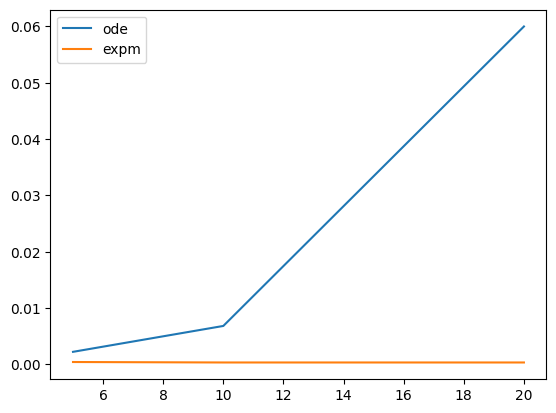

In [1]:
import scipy
import time
import matplotlib.pyplot as plt
import numpy as np
A=np.array([[-2,1,1],[1,-4,3],[1,3,-4]])
def eigen_method(A,t):
  w,v=np.linalg.eig(A)
  return v@np.diag(np.exp(w*t))@v.T

def expm_method(A,t):
  return scipy.linalg.expm(A*t)

def ode_method(A,t):
  def f(X,t):
    X=X.reshape(A.shape[0],A.shape[0])
    return (X@A).reshape(-1)
  x0=np.eye(A.shape[0]).reshape(-1)
  return scipy.integrate.odeint(f,x0,np.linspace(0,5,1000))[-1].reshape(A.shape[0],A.shape[0])


print("expm error is", np.linalg.norm(expm_method(A,5)-eigen_method(A,5)))
print("ode error is", np.linalg.norm(ode_method(A,5)-eigen_method(A,5)))

def generate_transition_rate_matrix(N):
  A=np.random.rand(N,N)
  for i in range(N):
    acc=0
    for j in range(N):
      if j!=i:
        acc=acc+A[i,j]
    A[i,i]=-acc
  return A

time_expm=np.zeros(3)
time_ode=np.zeros(3)

n=[5,10,20]
for i in range(3):
  A=generate_transition_rate_matrix(n[i])
  start=time.time()
  _=expm_method(A,5)
  end=time.time()
  time_expm[i]=end-start
  start=time.time()
  _=ode_method(A,5)
  end=time.time()
  time_ode[i]=end-start

print(time_ode)
print(time_expm)
plt.plot([5,10,20],time_ode,label="ode")
plt.plot([5,10,20],time_expm,label="expm")
plt.legend()
